In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('Twitch_global_data.csv')
data.rename(columns={
    'year':'ano',
    'Month':'mes',
    'Hours_watched':'horas_assistidas',
    'Avg_viewers':'media_visualizacoes',
    'Peak_viewers':'pico_de_visualizacoes',
    'Avg_channels':'media_canais',
    'Games_streamed':'jogos_transmitidos',
    'Viewer_ratio':'proporcao_de_espectadores',
}, inplace=True)
data

,ano,mes,horas_assistidas,media_visualizacoes,pico_de_visualizacoes,Streams,media_canais,jogos_transmitidos,proporcao_de_espectadores
0,2016,1,480241904,646355,1275257,7701675,20076,12149,29.08
1,2016,2,441859897,635769,1308032,7038520,20427,12134,28.98
2,2016,3,490669308,660389,1591551,7390957,20271,12234,28.92
3,2016,4,377975447,525696,1775120,6869719,16791,12282,28.80
4,2016,5,449836631,605432,1438962,7535519,19394,12424,28.85
...,...,...,...,...,...,...,...,...,...
80,2022,9,1817119612,2527287,4678056,22278079,90376,41863,28.37
81,2022,10,1883320673,2534751,4610799,22867973,90557,42164,28.35
82,2022,11,1694262814,2356415,5362892,21744817,88195,41058,26.84
83,2022,12,1674092138,2253152,3866814,21753674,84728,41548,27.00


None
AxesSubplot(0.125,0.11;0.775x0.77)
(2021, 5, 2308295297)
(2016, 9, 362833210)
O mês 5 do ano 2021 foi o mês com o maior número de horas assistidas, totalizando 2308295297 horas.
O mês 9 do ano 2016 foi o mês com o menor número de horas assistidas, totalizando 362833210 horas.


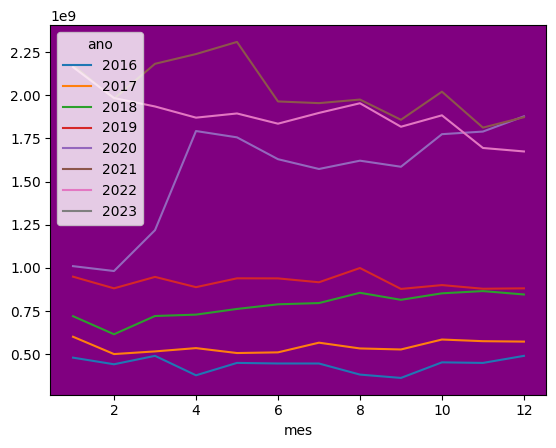

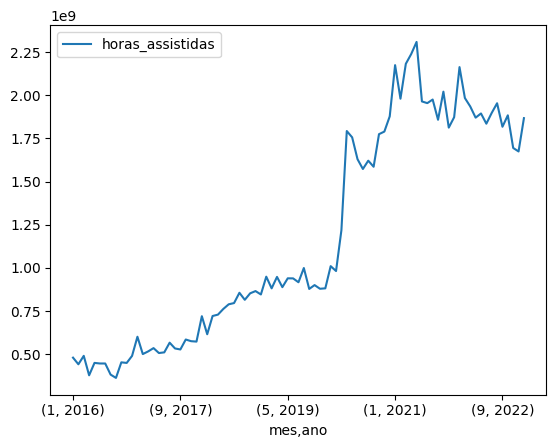

In [5]:
max_horas = data.groupby(['ano','mes','horas_assistidas'])['horas_assistidas'].sum().idxmax()
min_horas = data.groupby(['ano','mes','horas_assistidas'])['horas_assistidas'].sum().idxmin()
print(data.pivot_table(values='horas_assistidas', index='mes',columns='ano').round(0).plot().patch.set_facecolor('purple'))
print(data.pivot_table(values='horas_assistidas', index=['mes','ano']).sort_values(by= ['ano','mes'],ascending=True).plot())
print(max_horas)
print(min_horas)
print(f"O mês {max_horas[1]} do ano {max_horas[0]} foi o mês com o maior número de horas assistidas, totalizando {max_horas[2]} horas.")
print(f"O mês {min_horas[1]} do ano {min_horas[0]} foi o mês com o menor número de horas assistidas, totalizando {min_horas[2]} horas.")

In [26]:
#maior e menor crescimento de horas assistidas durante os meses

diferenca = data['horas_assistidas'].diff()
data['variacao_de_horas'] = diferenca

df = data.sort_values('variacao_de_horas',ascending=False)
# print(df)
df_select = df[['ano','mes','variacao_de_horas']]
print(df_select)
var_max = df.groupby(['ano','mes','variacao_de_horas'])['variacao_de_horas'].sum().idxmax()
var_min = df.groupby(['ano','mes','variacao_de_horas'])['variacao_de_horas'].sum().idxmin()
print(var_max)
print(var_min)


     ano  mes  variacao_de_horas
51  2020    4        573939027.0
60  2021    1        296474851.0
72  2022    1        290046300.0
50  2020    3        236617937.0
62  2021    3        202072109.0
..   ...  ...                ...
82  2022   11       -189057859.0
61  2021    2       -194212207.0
70  2021   11       -208080469.0
65  2021    6       -344665031.0
0   2016    1                NaN

[85 rows x 3 columns]
(2020, 4, 573939027.0)
(2021, 6, -344665031.0)


In [7]:
#maior e menor crescimento percentual durante os meses
horas  = data[['ano','mes','horas_assistidas']]
horas['var_percentual'] = horas['horas_assistidas'].pct_change().fillna(0)
print(horas['var_percentual'])
horas = horas.sort_values('var_percentual',ascending=False)
var_max_porcent = horas.groupby(['ano','mes','var_percentual'])['var_percentual'].sum().idxmax()
var_min_porcent = horas.groupby(['ano','mes','var_percentual'])['var_percentual'].sum().idxmin()
horas
print(var_max_porcent)
print(var_min_porcent)

print(f'''
em abril de {var_max_porcent[0]} temos o maior aumento percentual de horas assistidas
com um aumento de {var_max_porcent[2]:.2%}
''')
print(f'''
em abril de {var_min_porcent[0]} temos a maior redução  percentual de horas assistidas
com uma redução de {var_min_porcent[2]:.2%}
''')

0     0.000000
1    -0.079922
2     0.110464
3    -0.229674
4     0.190121
        ...   
80   -0.069663
81    0.036432
82   -0.100385
83   -0.011905
84    0.115209
Name: var_percentual, Length: 85, dtype: float64
(2020, 4, 0.47107117418179945)
(2016, 4, -0.2296737520823291)

em abril de 2020 temos o maior aumento percentual de horas assistidas
com um aumento de 47.11%


em abril de 2016 temos a maior redução  percentual de horas assistidas
com uma redução de -22.97%



C:\Users\Delson Cardoso\AppData\Local\Temp\ipykernel_12736\937122323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horas['var_percentual'] = horas['horas_assistidas'].pct_change().fillna(0)


In [6]:
media_transmicoes =data.pivot_table(values='Streams', index ='mes',aggfunc='mean',).round(0)
media_transmicoes.sort_values(by='Streams',ascending=False)

,Streams
mes,
1,17165910.0
3,16092204.0
5,15810690.0
7,15768544.0
8,15693955.0
12,15551058.0
4,15306593.0
6,14912642.0
10,14894164.0


In [24]:
diff = media_transmicoes.loc[1, 'Streams'] - media_transmicoes.loc[12, 'Streams']
diferenca_de_medias = media_transmicoes.diff().fillna(diff)
diferenca_de_medias.sort_values(by='Streams',ascending=False)
#ou seja, de dezembro para janeiro a média de visualizações aumenta em 1614852 vizualizações

,Streams
mes,
1,1614852.0
3,1363965.0
12,1078144.0
7,855902.0
5,504097.0
10,320877.0
8,-74589.0
11,-421250.0
4,-785611.0


In [48]:
media_transmicoes.sort_values(by= 'Streams',ascending=False)
#Ranking dos meses com maior média de transmissões


,Streams
mes,
1,17165910.0
3,16092204.0
5,15810690.0
7,15768544.0
8,15693955.0
12,15551058.0
4,15306593.0
6,14912642.0
10,14894164.0


In [38]:
media_canais = data.pivot_table(values='media_canais',index='mes',aggfunc='mean').round(0)
media_canais.sort_values(by='media_canais',ascending=False)

,media_canais
mes,
1,62690.0
4,61933.0
5,61151.0
12,60974.0
7,60809.0
8,60726.0
11,60214.0
3,59720.0
2,59537.0


,media_canais
ano,
2016,19128.0
2017,24623.0
2018,41131.0
2019,49523.0
2020,87628.0
2021,104904.0
2022,93216.0
2023,93349.0


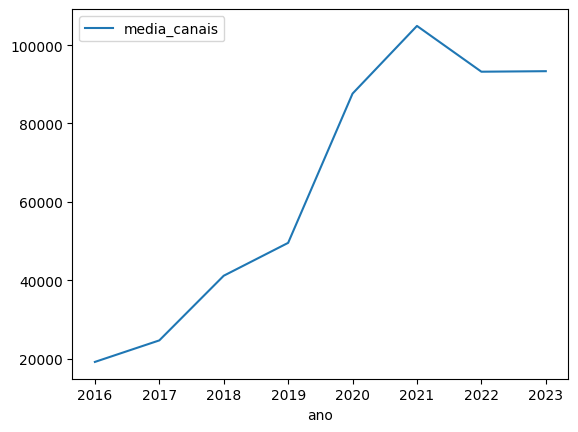

In [45]:
media_canais_ano = data.pivot_table(values='media_canais',index='ano',aggfunc='mean').round(0)
# media_canais_ano = media_canais_ano.sort_values(by='media_canais',ascending=False)
media_canais_ano.plot()
media_canais_ano
print(F'''A maior media de canais transmitindo no ano de 2021
com uma media de ''')